Coin Flipping Model

In [3]:
#importing important libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from scipy.special import comb
from scipy.integrate import quad
from scipy import integrate
import time

In [4]:
def likelihood(numH, total):
    if(numH > total):
        print('Error: Total number of heads cannot exceed total flips')
        return
    x = np.arange(0.,1.,0.0001)
    y = comb(total, numH) * (x**numH) * (1 - x)**(total - numH)
    plt.figure()
    plt.plot(x,y)
    plt.show()

In [5]:
#def likelihoodIm(numH, total):
#    if(numH > total):
#        print('Error: Total number of heads cannot exceed total flips')
#        return
#    TOTAL = quad(lambda p: p**numH * (1-p)**(total-numH),0,1)
#    x = np.arange(0.,1.,0.0001)
#    y = (x**numH) * (1 - x)**(total - numH)
#    z = [a/TOTAL[0] for a in y]
#    print(TOTAL)
#    plt.figure()
#    plt.plot(x,z)
#    plt.show()

In [6]:
#n is the total amount of heads flipped and N is the total coins flipped
def likelihoodIm(n, N):
    if(n > N):
        print('Error: Total number of heads cannot exceed total flips')
        return
    #the total probability
    total = quad(lambda p: p**n * (1 - p)**(N - n),0,1)
    
    x = np.arange(0.,1.,0.0001)
    #creates a temporary list that will be divided by the total
    temp = (x**n) * (1 - x)**(N - n)
    #loop through the temp list and divide by the total
    y = [a/total[0] for a in temp]
    #print(TOTAL)
    plt.figure()
    plt.plot(x,y)
    plt.show()

In [37]:
#n is the total amount of heads flipped and N is the total coins flipped
#68% confidence region:
def confidence(n, N):
    if(n > N):
        print('Error: Total number of heads cannot exceed total flips')
        return    
    #the total probability
    t1 = time.time()
    total = quad(lambda p: p**n * (1 - p)**(N - n),0,1)
    region = (0,0)
    sigma = 0
    while(0.68 * total[0] > region[0]):
        region = quad(lambda q: q**n * (1 - q)**(N - n), n/N - sigma, n/N + sigma)
        sigma += 0.0001
    print('Runtime: ' + str(time.time() - t1))
    print('Standard deviation: ' + str(sigma))
    print('68% Confidence region: ' + str(n/N - sigma) + ' to ' + str(n/N + sigma))
    print('95% Confidence region: ' + str(n/N - 2 * sigma) + ' to ' + str(n/N + 2 * sigma))
    #this approximation works best as N grows large
    #it comes from the fisher information
    print('Approximation: ' + str(((n/N*(1-n/N))/N)**(1/2)))

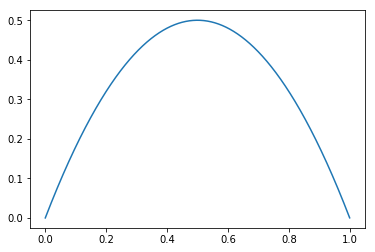

In [8]:
likelihood(1,2)

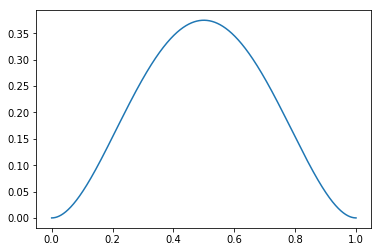

In [9]:
likelihood(2,4)

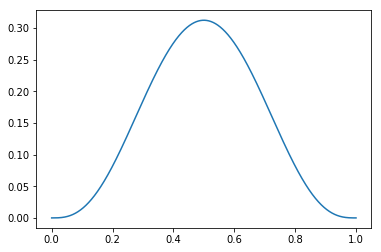

In [10]:
likelihood(3,6)

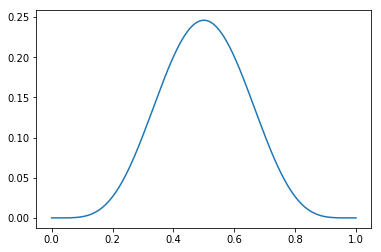

In [11]:
likelihood(5,10)

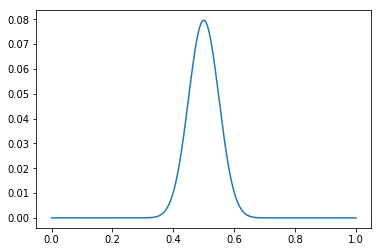

In [12]:
likelihood(50,100)

In [13]:
likelihood()

TypeError: likelihood() missing 2 required positional arguments: 'numH' and 'total'

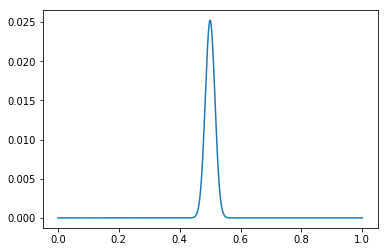

In [14]:
likelihood(500,1000)

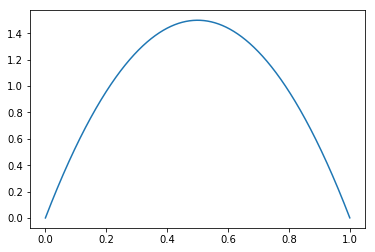

In [15]:
likelihoodIm(1,2)

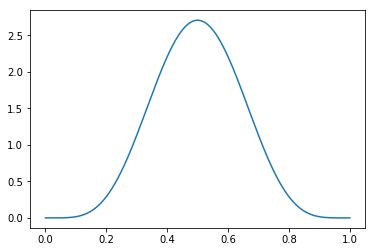

In [16]:
likelihoodIm(5,10)

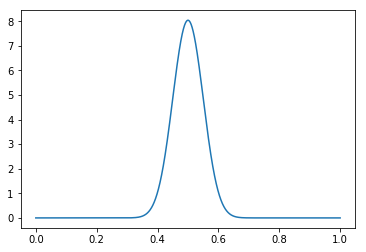

In [17]:
likelihoodIm(50,100)

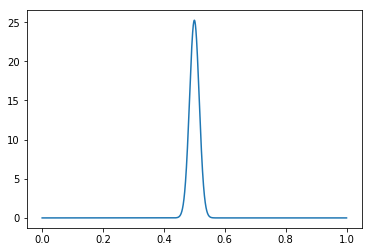

In [18]:
likelihoodIm(500,1000)

In [33]:
confidence(1,2)

Runtime: 0.06595683097839355
Standard deviation: 0.24679999999998914
68% Confidence region: 0.25320000000001086 to 0.7467999999999891
95% Confidence region: 0.006400000000021722 to 0.9935999999999783
Approximation: 0.3535533905932738


In [34]:
confidence(5,10)

Runtime: 0.040117740631103516
Standard deviation: 0.1436000000000005
68% Confidence region: 0.3563999999999995 to 0.6436000000000005
95% Confidence region: 0.212799999999999 to 0.787200000000001
Approximation: 0.15811388300841897


In [35]:
confidence(50,100)

Runtime: 0.014400959014892578
Standard deviation: 0.04940000000000039
68% Confidence region: 0.4505999999999996 to 0.5494000000000003
95% Confidence region: 0.4011999999999992 to 0.5988000000000008
Approximation: 0.05


In [36]:
confidence(500,1000)

Runtime: 0.0036439895629882812
Standard deviation: 0.01589999999999996
68% Confidence region: 0.48410000000000003 to 0.5158999999999999
95% Confidence region: 0.46820000000000006 to 0.5317999999999999
Approximation: 0.015811388300841896
